In [1]:
import gdown

url = 'https://drive.google.com/uc?id=1l-JtC-1pn6wlIpBIV8FX10_gdr_8Jv2x'
output = '55_postProcbest.mat'
gdown.download(url, output, quiet=False)





Downloading...
From (uriginal): https://drive.google.com/uc?id=1l-JtC-1pn6wlIpBIV8FX10_gdr_8Jv2x
From (redirected): https://drive.google.com/uc?id=1l-JtC-1pn6wlIpBIV8FX10_gdr_8Jv2x&confirm=t&uuid=46e6e985-bc5e-454e-9f98-ac9c68491e11
To: C:\Users\pujay\EEG processing\55_postProcbest.mat
100%|███████████████████████████████████████████████████████████████████████████████| 185M/185M [00:20<00:00, 9.23MB/s]


'55_postProcbest.mat'

In [2]:

from glob import glob
import os
import mne
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io
import scipy.io


file_path = '55_postProcbest.mat'

# Load the data from the .mat file
mat = scipy.io.loadmat(file_path)
print(mat)







{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Jun 30 14:22:06 2019', '__version__': '1.0', '__globals__': [], 'Xproc': array([[[ 1.41583206e+01, -6.00780209e+01, -7.98966516e+01, ...,
         -3.14745501e+01,  1.81628525e+01, -5.85153996e+01],
        [ 6.83653736e+00, -6.11449786e+01, -7.82330968e+01, ...,
         -2.36256283e+01,  2.00927781e+01, -5.67508155e+01],
        [ 1.40422720e+01, -6.38639654e+01, -7.14007282e+01, ...,
         -1.30330471e+01,  2.48338386e+01, -6.46784555e+01],
        ...,
        [-6.52613517e+01, -2.88247921e+01,  1.32481461e+01, ...,
          1.42694872e+01, -3.28767380e+01,  5.88835754e+01],
        [-5.45188252e+01, -3.46765913e+01,  2.44307615e+01, ...,
          2.26470631e+01, -2.97958587e+01,  5.31597576e+01],
        [-3.93357167e+01, -4.36475699e+01,  4.09775214e+01, ...,
          2.33700548e+01, -3.42230724e+01,  4.72485965e+01]],

       [[-6.74524004e+00, -4.69170144e+01, -7.20886554e+01, ...,
         -2.421893

In [3]:
scipy.io.whosmat(file_path)

[('Xproc', (30, 1250, 641), 'double'), ('Yproc', (1, 641), 'double')]

In [4]:
import scipy.io


mat_data = scipy.io.loadmat(file_path)

# Extract and print 'Xproc' values
Xproc = mat_data['Xproc']  
print(Xproc)

[[[ 1.41583206e+01 -6.00780209e+01 -7.98966516e+01 ... -3.14745501e+01
    1.81628525e+01 -5.85153996e+01]
  [ 6.83653736e+00 -6.11449786e+01 -7.82330968e+01 ... -2.36256283e+01
    2.00927781e+01 -5.67508155e+01]
  [ 1.40422720e+01 -6.38639654e+01 -7.14007282e+01 ... -1.30330471e+01
    2.48338386e+01 -6.46784555e+01]
  ...
  [-6.52613517e+01 -2.88247921e+01  1.32481461e+01 ...  1.42694872e+01
   -3.28767380e+01  5.88835754e+01]
  [-5.45188252e+01 -3.46765913e+01  2.44307615e+01 ...  2.26470631e+01
   -2.97958587e+01  5.31597576e+01]
  [-3.93357167e+01 -4.36475699e+01  4.09775214e+01 ...  2.33700548e+01
   -3.42230724e+01  4.72485965e+01]]

 [[-6.74524004e+00 -4.69170144e+01 -7.20886554e+01 ... -2.42189343e+01
   -1.78583056e+00 -6.84636586e+01]
  [-1.52403580e+01 -5.31530961e+01 -8.66471952e+01 ... -2.64418843e+01
   -2.83252412e+00 -7.78579832e+01]
  [ 4.23271088e-01 -6.13007845e+01 -9.34951399e+01 ... -2.22728103e+01
    7.45220836e+00 -7.92091716e+01]
  ...
  [-6.90170226e+01 -4.0

In [7]:
first_channel_data = Xproc[0, :, 0]  


print("Shape of the first channel data:", first_channel_data.shape)


print("First few elements of the first channel data:", first_channel_data[:10])

Shape of the first channel data: (1250,)
First few elements of the first channel data: [14.15832064  6.83653736 14.04227196 24.45644681 25.40738744 22.12998
 19.86788701 23.26066755 25.56397549 22.83365925]


In [5]:


import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt


xproc_data = np.random.rand(30, 1250, 641)  
num_channels = xproc_data.shape[0]
num_samples = xproc_data.shape[2]

# Filter characteristics
fs = 1250  # Sampling frequency
low_cutoff = 40.0

# Design the low-pass filter using Butterworth
nyquist = 0.5 * fs
low = low_cutoff / nyquist
order = 2 
b_low, a_low = butter(order, low, btype='low')

# Initialize empty list to store filtered data for each channel
filtered_data = []

for channel_num in range(num_channels):
    eeg_channel = xproc_data[channel_num]

    # Apply the low-pass filter to the channel's EEG data using filtfilt
    filtered_low = filtfilt(b_low, a_low, eeg_channel)
    
    # Append filtered data to the list
    filtered_data.append(filtered_low)

# Calculate the mean across all filtered signals
mean_filtered_data = np.mean(filtered_data, axis=0)

reshaped_data = np.array(filtered_data).reshape(num_channels, -1).




# Display the mean of the filtered data
print(f"Shape of mean filtered data: {mean_filtered_data.shape}")
print(f"Mean of the filtered data: {np.mean(mean_filtered_data)}")

Shape of mean filtered data: (1250, 641)
Mean of the filtered data: 0.5000784037435664


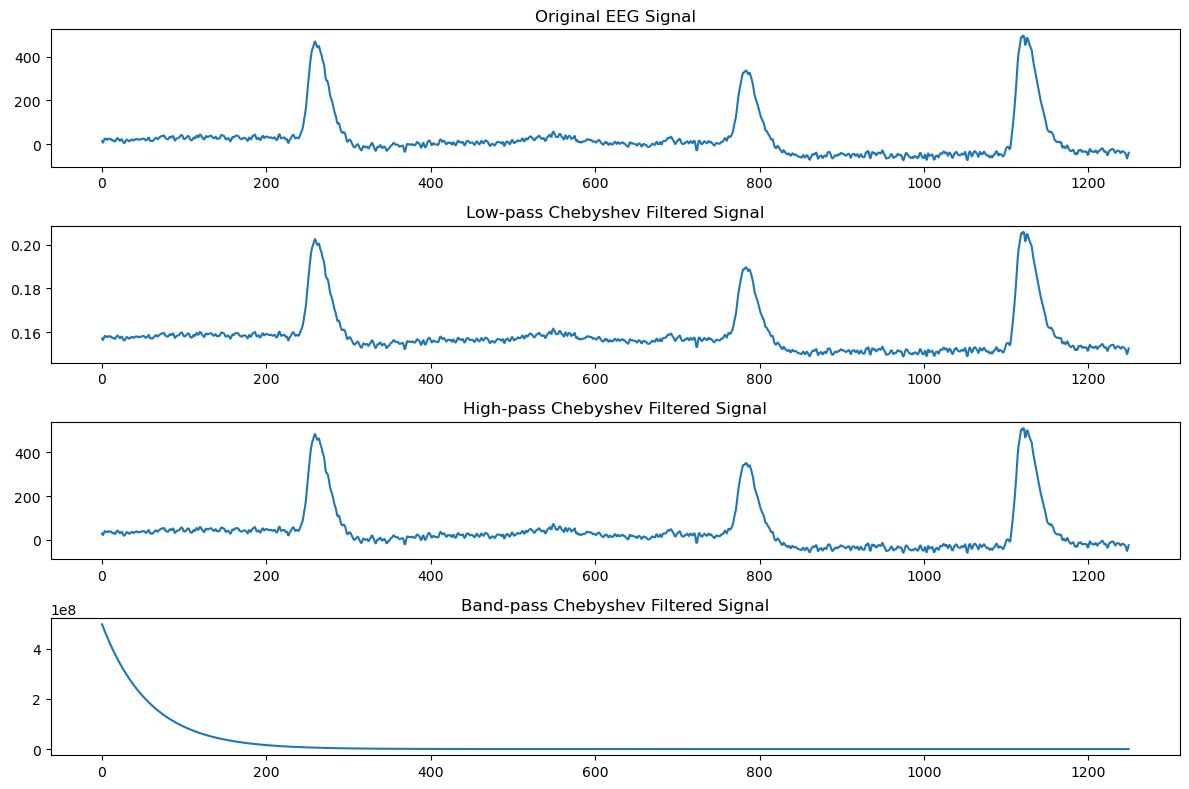

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cheby2, filtfilt
data_dimensions = (30, 1250, 641)  # (Channels, Sampling Frequency, Samples)




channel_num = 29

# EEG data for the selected channel
eeg_channel = first_channel_data 

# Filter characteristics
fs = 1250  # Sampling frequency
low_cutoff = 40.0  
high_cutoff = 0.5  
bandpass_low = 10.0 
bandpass_high = 30.0  
order = 2 

# New filter characteristics
new_low_cutoff = 50.0  
new_high_cutoff = 1.0  
new_bandpass_low = 15.0 
new_bandpass_high = 35.0  
new_order = 4  # Changing filter order to 4

# Replace the existing filter characteristics with the new ones
low_cutoff = new_low_cutoff
high_cutoff = new_high_cutoff
bandpass_low = new_bandpass_low
bandpass_high = new_bandpass_high
order = new_order

# Redefine the filters using the updated characteristics
nyquist = 1000 * fs
low = low_cutoff / nyquist
high = high_cutoff / nyquist
band = [bandpass_low / nyquist, bandpass_high / nyquist]

b_low, a_low = cheby2(order, 40, low, btype='low')
b_high, a_high = cheby2(order, 0.5, high, btype='high')
b_band, a_band = cheby2(order, 100, band, btype='bandpass')

# Apply the updated filters to the channel's EEG data
filtered_low = filtfilt(b_low, a_low, eeg_channel)
filtered_high = filtfilt(b_high, a_high, eeg_channel)
filtered_band = filtfilt(b_band, a_band, eeg_channel)

# Rest of the code remains the same for plotting
# ...

# Initialize figure for plotting
plt.figure(figsize=(12, 8))

# Plotting the original signal
plt.subplot(411)
plt.plot(eeg_channel)
plt.title('Original EEG Signal')

# Plotting the low-pass filtered signal
plt.subplot(412)
plt.plot(filtered_low)
plt.title('Low-pass Chebyshev Filtered Signal')

# Plotting the high-pass filtered signal
plt.subplot(413)
plt.plot(filtered_high)
plt.title('High-pass Chebyshev Filtered Signal')

# Plotting the band-pass filtered signal
plt.subplot(414)
plt.plot(filtered_band)
plt.title('Band-pass Chebyshev Filtered Signal')

plt.tight_layout()
plt.show()

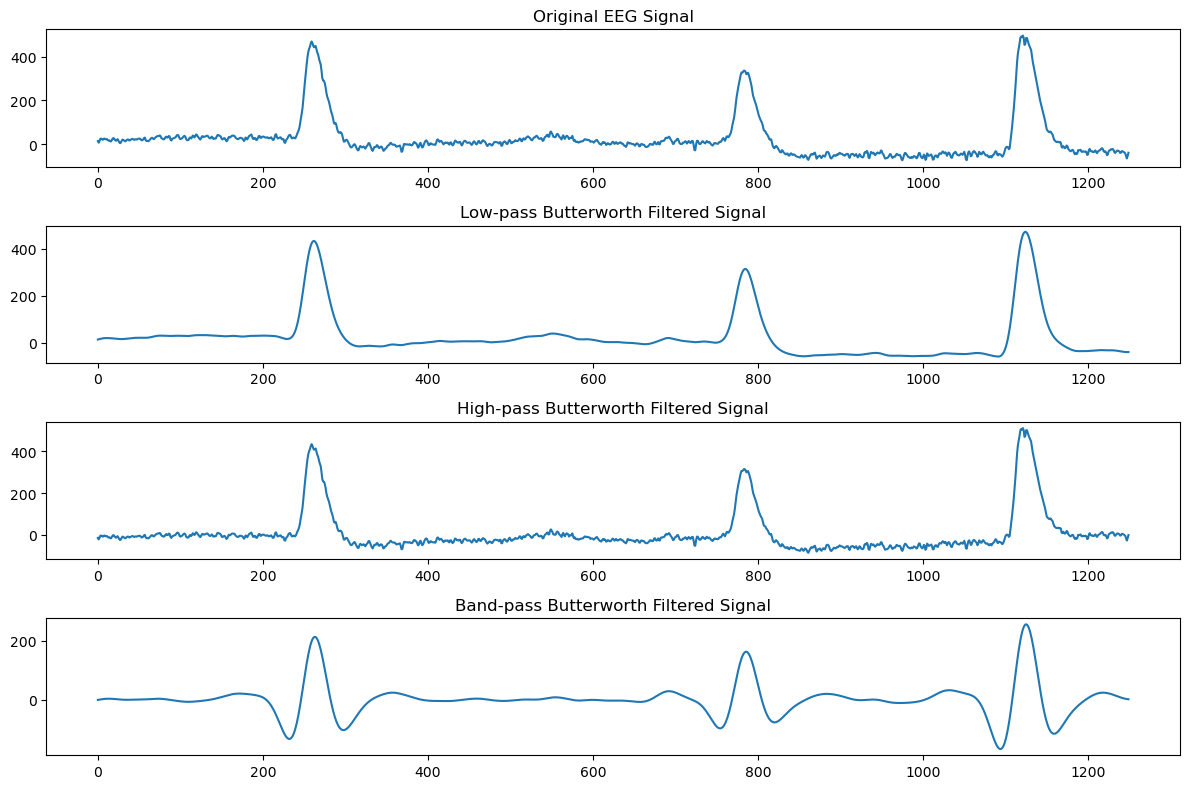

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt


channel_num = 0  

# EEG data for the selected channel
eeg_channel = first_channel_data  

# Filter characteristics
fs = 1250  # Sampling frequency
low_cutoff = 40.0  
high_cutoff = 0.5  
bandpass_low = 10.0 
bandpass_high = 30.0  
order = 2 

# Design the filters using Butterworth
nyquist = 0.5 * fs
low = low_cutoff / nyquist
high = high_cutoff / nyquist
band = [bandpass_low / nyquist, bandpass_high / nyquist]

b_low, a_low = butter(order, low, btype='low')
b_high, a_high = butter(order, high, btype='high')
b_band, a_band = butter(order, band, btype='bandpass')

# Apply the filters to the channel's EEG data using filtfilt
filtered_low = filtfilt(b_low, a_low, eeg_channel)
filtered_high = filtfilt(b_high, a_high, eeg_channel)
filtered_band = filtfilt(b_band, a_band, eeg_channel)

# Initialize figure for plotting
plt.figure(figsize=(12, 8))

# Plotting the original signal
plt.subplot(411)
plt.plot(eeg_channel)
plt.title('Original EEG Signal')

# Plotting the low-pass filtered signal
plt.subplot(412)
plt.plot(filtered_low)
plt.title('Low-pass Butterworth Filtered Signal')

# Plotting the high-pass filtered signal
plt.subplot(413)
plt.plot(filtered_high)
plt.title('High-pass Butterworth Filtered Signal')

# Plotting the band-pass filtered signal
plt.subplot(414)
plt.plot(filtered_band)
plt.title('Band-pass Butterworth Filtered Signal')

plt.tight_layout()
plt.show()

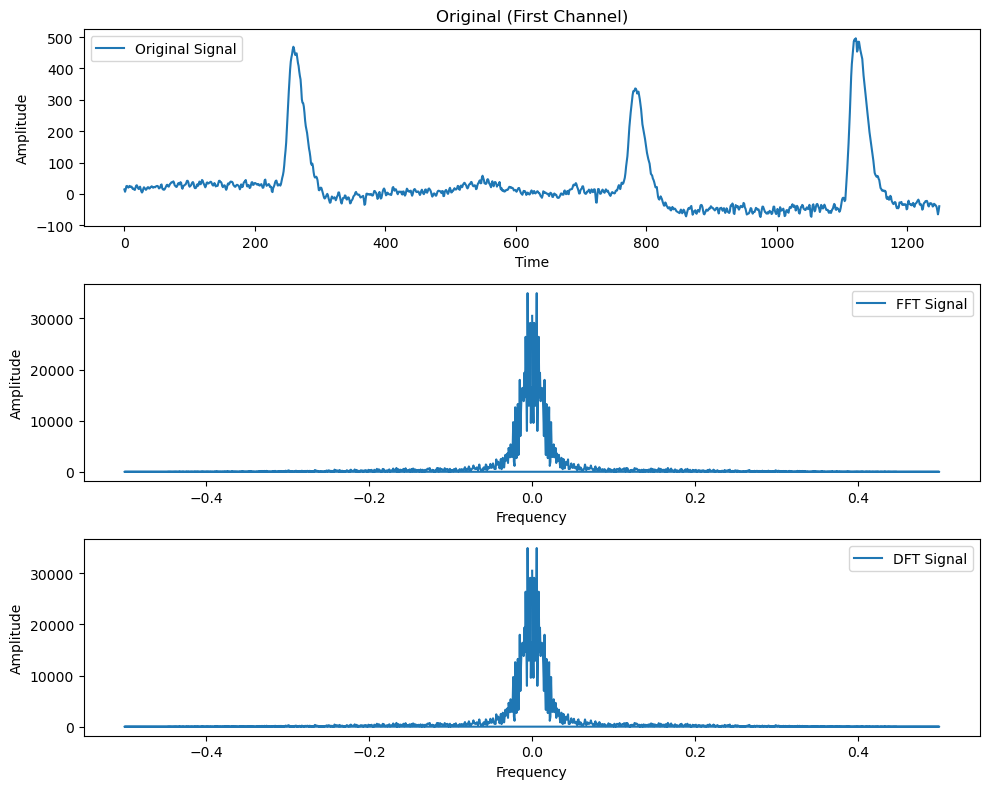

In [11]:


import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

channel_data = Xproc[0, :, 0]  
time = np.arange(len(channel_data))

# Calculate FFT using scipy
fft_result = fft(channel_data)
freqs = fftfreq(len(channel_data))

# Calculate DFT using numpy and create a corresponding frequency axis
dft_result =np.fft.fft(channel_data)
dft_freqs = np.fft.fftfreq(len(channel_data))

# Plotting the signals on a single graph with three subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 8))

# Original Signal
axs[0].plot(time, channel_data, label='Original Signal')
axs[0].set_title('Original (First Channel)')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Amplitude')
axs[0].legend()

# FFT Signal
axs[1].plot(freqs, np.abs(fft_result), label='FFT Signal')
axs[1].set_xlabel('Frequency')
axs[1].set_ylabel('Amplitude')
axs[1].legend()

# DFT Signal with matched frequency axis
axs[2].plot(freqs, np.abs(dft_result), label='DFT Signal')
axs[2].set_xlabel('Frequency')
axs[2].set_ylabel('Amplitude')
axs[2].legend()

plt.tight_layout()
plt.show()

In [13]:


import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt


xproc_data = np.random.rand(30, 1250, 641)  
num_channels = xproc_data.shape[0]
num_samples = xproc_data.shape[2]

# Filter characteristics
fs = 1250  # Sampling frequency
low_cutoff = 40.0

# Design the low-pass filter using Butterworth
nyquist = 0.5 * fs
low = low_cutoff / nyquist
order = 2 
b_low, a_low = butter(order, low, btype='low')

# Initialize empty list to store filtered data for each channel
filtered_data = []

for channel_num in range(num_channels):
    eeg_channel = xproc_data[channel_num]

    # Apply the low-pass filter to the channel's EEG data using filtfilt
    filtered_low = filtfilt(b_low, a_low, eeg_channel)
    
    # Append filtered data to the list
    filtered_data.append(filtered_low)

# Calculate the mean across all filtered signals
mean_filtered_data = np.mean(filtered_data, axis=0)
reshaped_data = np.array(filtered_data).reshape(num_channels, -1)





# Display the mean of the filtered data
print(f"Shape of mean filtered data: {mean_filtered_data.shape}")
print(f"Mean of the filtered data: {np.mean(mean_filtered_data)}")

Shape of mean filtered data: (1250, 641)
Mean of the filtered data: 0.5000326085032724


In [6]:
# Compute the correlation matrix
correlation_matrix = np.corrcoef(reshaped_data, rowvar=False)

# Display the correlation matrix
print("Correlation Matrix of the Butterworth filtered data:")
print(correlation_matrix)


Correlation Matrix of the Butterworth filtered data:
[[ 1.00000000e+00  1.81040381e-03 -1.13227929e-02 -7.12703660e-04
  -4.01215866e-03 -6.74575405e-03  1.13739067e-03 -1.83311370e-03
   5.48228734e-03  1.42407463e-03 -1.17456331e-03  2.54749515e-04
   2.74478267e-03 -6.96972032e-03 -2.12558642e-03 -3.95044266e-04
   5.10031938e-03  1.34753254e-03 -6.35901859e-03 -3.32530200e-03
   1.24382137e-03  2.13888230e-03  9.90126939e-03 -3.89080669e-03
  -4.13536631e-03  8.48444681e-03  3.04889924e-04  9.72906209e-04
  -4.14268280e-03  4.46964198e-03]
 [ 1.81040381e-03  1.00000000e+00  1.41390951e-02 -1.19029872e-02
  -2.28798789e-03  1.00705469e-04  1.46216059e-03 -3.67121634e-03
  -3.94228851e-03 -2.69069860e-03 -3.75391677e-03  1.20865403e-03
  -2.56666649e-03 -1.39190899e-03  9.96932219e-04  4.25427461e-03
  -4.47210518e-04  3.89176309e-03  2.79896461e-03 -1.84953131e-03
  -4.38378081e-03  2.42028915e-03  7.76459204e-03 -8.66701981e-03
  -1.65173108e-03  5.36792083e-04  2.85844982e-05 -7.0

In [7]:



shape_of_corr_matrix = correlation_matrix.shape

# Display the shape of the correlation matrix
print("Shape of the Correlation Matrix:", shape_of_corr_matrix)


Shape of the Correlation Matrix: (30, 30)


In [8]:

# Compute the covariance matrix
covariance_matrix = np.cov(reshaped_data, rowvar=False)

# Display the covariance matrix
print("Covariance Matrix of the filtered data:")
print(covariance_matrix)


Covariance Matrix of the filtered data:
[[ 5.12347462e-03  9.26429302e-06 -5.80414155e-05 -3.66298238e-06
  -2.06326355e-05 -3.45307718e-05  5.85143542e-06 -9.41002737e-06
   2.82861144e-05  7.31128321e-06 -6.05037570e-06  1.30184595e-06
   1.41428306e-05 -3.59339980e-05 -1.09027478e-05 -2.04381541e-06
   2.61783106e-05  6.85782126e-06 -3.28251044e-05 -1.71154057e-05
   6.38165627e-06  1.09382018e-05  5.07898716e-05 -2.00038386e-05
  -2.12324160e-05  4.35076332e-05  1.57026222e-06  4.98870270e-06
  -2.11873712e-05  2.29711048e-05]
 [ 9.26429302e-06  5.11103747e-03  7.23899511e-05 -6.11018060e-05
  -1.17517506e-05  5.14874139e-07  7.51311553e-06 -1.88227771e-05
  -2.03157164e-05 -1.37974284e-05 -1.93135803e-05  6.16908096e-06
  -1.32090034e-05 -7.16759183e-06  5.10734353e-06  2.19833394e-05
  -2.29260108e-06  1.97817875e-05  1.44306425e-05 -9.50801882e-06
  -2.24644848e-05  1.23622788e-05  3.97811303e-05 -4.45057081e-05
  -8.47026520e-06  2.74928819e-06  1.47038791e-07 -3.61648374e-06
 

In [9]:

shape_of_cov_matrix = covariance_matrix.shape

print("Shape of the Corvariance_Matrix:", shape_of_cov_matrix)

Shape of the Corvariance_Matrix: (30, 30)


In [10]:

from scipy.stats import entropy

# Calculate entropy for each channel
channel_entropies = [entropy(channel_data) for channel_data in filtered_data]

# Compute average entropy across channels
average_entropy = np.mean(channel_entropies)

# Display the entropy values
print("Entropy for each channel:")
for i, entropy_val in enumerate(channel_entropies, start=1):
    print(f"Channel {i}: {entropy_val}")

print("\nAverage entropy across channels:", average_entropy)


Entropy for each channel:
Channel 1: [      -inf 6.99756827 7.03823761 7.06769585 7.08841279 7.1023796
 7.11129488 7.11658644 7.11941457 7.12068325 7.1210595  7.12100194
 7.12080007 7.12061634 7.12052309 7.12053326 7.12062693 7.12077281
 7.12094216 7.12111467 7.12127848 7.1214272  7.12155677 7.12166411
 7.121747   7.12180363 7.12183393 7.12184301 7.12184144 7.12184081
 7.1218488  7.12186771 7.12189576 7.12192883 7.12196163 7.1219889
 7.12200763 7.12201826 7.12202342 7.12202671 7.12203308 7.12204847
 7.1220774  7.12212092 7.12217624 7.12223738 7.12229646 7.12234571
 7.12237892 7.1223909  7.12237715 7.12233604 7.12227149 7.12219345
 7.12211481 7.12204666 7.1219957  7.12196487 7.12195474 7.12196463
 7.12199388 7.12204253 7.12211091 7.12219853 7.12230228 7.12241578
 7.12253041 7.12263595 7.12272181 7.12277958 7.12280457 7.12279517
 7.12275167 7.12267663 7.1225765  7.12246164 7.12234443 7.12223598
 7.12214315 7.12206815 7.12201032 7.12196749 7.12193701 7.1219174
 7.1219091  7.12191316 7.121

Channel 26: [      -inf 6.9992565  7.03884005 7.06770446 7.08816077 7.10208734
 7.1111016  7.11657795 7.11964111 7.12116453 7.12178415 7.12193036
 7.12187254 7.12176358 7.12167716 7.12163687 7.12163826 7.12166535
 7.12170056 7.12172892 7.12174034 7.12173098 7.12170265 7.12166056
 7.12161113 7.12156022 7.12151195 7.12146927 7.12143543 7.12141401
 7.12140707 7.12141417 7.12143308 7.12146082 7.12149562 7.12153718
 7.12158366 7.12162964 7.12166753 7.12169083 7.12169625 7.12168425
 7.12165822 7.12162247 7.12158059 7.12153587 7.12149179 7.12145182
 7.12141954 7.12139789 7.121388   7.12138947 7.1214017  7.12142404
 7.1214554  7.12149531 7.12154471 7.12160429 7.12167285 7.12174747
 7.12182432 7.12189909 7.12196649 7.12202045 7.12205641 7.12207369
 7.12207587 7.12206969 7.12206252 7.1220604  7.12206754 7.12208589
 7.12211493 7.12215196 7.12219202 7.12222755 7.12224942 7.12225014
 7.12222704 7.12218281 7.12212496 7.12206551 7.12201903 7.12199911
 7.12201511 7.12207005 7.1221594  7.12227109 7.122

In [11]:
# Calculate RMS for each channel
channel_rms = [np.sqrt(np.mean(np.square(channel_data))) for channel_data in filtered_data]

# Compute the average RMS across channels
average_rms = np.mean(channel_rms)

# Display the average RMS
print("Average Root Mean Square (RMS) across channels:", average_rms)





Average Root Mean Square (RMS) across channels: 0.5051981718934293


In [12]:
##statitical


In [13]:

# Calculate median for each channel
channel_medians = [np.median(channel_data) for channel_data in filtered_data]

# Compute the overall median across all channels
overall_median = np.median(channel_medians)

print("Median for each channel:", channel_medians)
print("\nOverall Median across all channels:", overall_median)


Median for each channel: [0.5002257199543356, 0.49974757983466195, 0.499670815999552, 0.5002441496349244, 0.4996453314783813, 0.5005141243300752, 0.49979707056533085, 0.5001338054367769, 0.500075788008443, 0.5007799842501363, 0.5006159981651206, 0.5006498658075609, 0.4999202552543381, 0.49957739775260457, 0.4996143310169261, 0.4995827559702597, 0.5005310186250072, 0.5004351240815091, 0.49985097208464757, 0.4994731479623402, 0.5005223320400074, 0.4999569045849314, 0.5003199663331608, 0.49980086597689266, 0.5008174290710947, 0.4998037294645427, 0.49940435653237236, 0.5000759388969681, 0.5000616179615374, 0.5004236275538141]

Overall Median across all channels: 0.5000687029849902


In [14]:

channel_std_devs = [np.std(channel_data) for channel_data in filtered_data]


overall_std_dev = np.std(channel_std_devs)

# Display the standard deviation values
print("Standard deviation for each channel:", channel_std_devs)
print("\nOverall Standard deviation across all channels:", overall_std_dev)


Standard deviation for each channel: [0.07157840611378402, 0.07149147566110471, 0.07161464848404475, 0.07180311333347926, 0.07184458524597871, 0.07151435352313185, 0.07187373078975151, 0.07171647227414435, 0.07208234941036659, 0.07172627741742241, 0.07196533420358758, 0.07139432038682914, 0.0719856299611558, 0.07202903939101193, 0.07165964206409035, 0.07227920069724704, 0.07170702077690184, 0.07109913785224108, 0.0721163031964786, 0.07190739247640732, 0.07167914687798517, 0.0714457627125323, 0.07166443358816567, 0.0718275613842209, 0.07173033571154518, 0.07164062420310216, 0.07195260897557136, 0.07163645441836415, 0.07145174311797847, 0.07180035313666026]

Overall Standard deviation across all channels: 0.00024181872542017413


In [15]:
from scipy.stats import kurtosis

# Calculate kurtosis for each channel
channel_kurtosis = [kurtosis(channel_data) for channel_data in filtered_data]

# Compute the overall kurtosis across all channels
overall_kurtosis = np.mean(channel_kurtosis)

# Display the kurtosis values
print("Kurtosis for each channel:", channel_kurtosis)




Kurtosis for each channel: [array([-1.18862210e+00, -1.18513955e+00, -1.16303778e+00, -1.10738508e+00,
       -9.96299482e-01, -8.07618603e-01, -5.44653689e-01, -2.73295941e-01,
       -9.69288144e-02, -4.61368997e-02, -6.42656577e-02, -9.89361537e-02,
       -1.29452171e-01, -1.48709949e-01, -1.54378636e-01, -1.48204714e-01,
       -1.35763939e-01, -1.24560929e-01, -1.20566413e-01, -1.25445516e-01,
       -1.36705229e-01, -1.50103105e-01, -1.61838254e-01, -1.68683515e-01,
       -1.66847406e-01, -1.52056773e-01, -1.21367883e-01, -7.50769619e-02,
       -1.78332402e-02,  4.15605707e-02,  9.19635342e-02,  1.22815491e-01,
        1.27374867e-01,  1.04954662e-01,  6.10338437e-02,  5.20661216e-03,
       -5.18833119e-02, -1.00627474e-01, -1.33441705e-01, -1.45924854e-01,
       -1.37740144e-01, -1.12210170e-01, -7.47775816e-02, -3.18840095e-02,
        9.20502109e-03,  4.15801813e-02,  6.18638184e-02,  7.25013616e-02,
        7.96713180e-02,  8.81347253e-02,  9.76030149e-02,  1.02278773e-0

In [16]:
print("\nOverall Kurtosis across all channels:", overall_kurtosis)


Overall Kurtosis across all channels: -0.09747308693189641


In [17]:
from scipy.stats import skew

# Calculate skewness for each channel
channel_skewness = [skew(channel_data) for channel_data in filtered_data]

# Compute the overall skewness across all channels
overall_skewness = np.mean(channel_skewness)

# Display the skewness values
print("Skewness for each channel:", channel_skewness)


Skewness for each channel: [array([-2.63877073e-02, -2.96062047e-02, -3.23565366e-02, -3.39570099e-02,
       -3.33456170e-02, -2.99215626e-02, -2.65259983e-02, -3.28842761e-02,
       -6.00149158e-02, -1.03854978e-01, -1.44985266e-01, -1.68415504e-01,
       -1.71909064e-01, -1.59949180e-01, -1.37707544e-01, -1.09354747e-01,
       -7.84693942e-02, -4.85009139e-02, -2.28927565e-02, -4.84895628e-03,
        3.32726978e-03,  9.59690674e-04, -1.05591962e-02, -2.77325943e-02,
       -4.57286599e-02, -5.97571968e-02, -6.62815999e-02, -6.40127668e-02,
       -5.44104943e-02, -4.09460232e-02, -2.76621811e-02, -1.79386596e-02,
       -1.35013320e-02, -1.39436138e-02, -1.71003256e-02, -1.99604200e-02,
       -1.96575322e-02, -1.43836812e-02, -3.90717669e-03,  1.05444738e-02,
        2.66861088e-02,  4.15771387e-02,  5.23035064e-02,  5.69257433e-02,
        5.49840347e-02,  4.75250248e-02,  3.68643714e-02,  2.55568730e-02,
        1.51204569e-02,  5.86451547e-03, -2.27491197e-03, -8.98467964e-0

In [18]:
print("\nOverall Skewness across all channels:", overall_skewness)



Overall Skewness across all channels: -0.0016327943300681054


In [19]:

# Define frequency bands of interest (in Hz)
delta_band = (0.5, 4)    # Delta band (0.5 Hz - 4 Hz)
theta_band = (4, 8)      # Theta band (4 Hz - 8 Hz)
alpha_band = (8, 13)     # Alpha band (8 Hz - 13 Hz)
beta_band = (13, 30)     # Beta band (13 Hz - 30 Hz)
gamma_band = (30, 100)   # Gamma band (30 Hz - 100 Hz)

# Initialize lists to store band power for each channel
delta_power = []
theta_power = []
alpha_power = []
beta_power = []
gamma_power = []

# Calculate band power for each channel
for channel_data in filtered_data:
    channel_fft = np.fft.fft(channel_data)
    channel_psd = np.abs(channel_fft)**2 / len(channel_data)
    
    # Compute frequency resolution
    freq_resolution = fs / len(channel_data)
    
    # Define frequency indices for each band
    delta_indices = np.where((freq_resolution * np.arange(len(channel_data))) >= delta_band[0])
    delta_indices = np.intersect1d(delta_indices, np.where((freq_resolution * np.arange(len(channel_data))) <= delta_band[1]))
    
    theta_indices = np.where((freq_resolution * np.arange(len(channel_data))) >= theta_band[0])
    theta_indices = np.intersect1d(theta_indices, np.where((freq_resolution * np.arange(len(channel_data))) <= theta_band[1]))
    
    alpha_indices = np.where((freq_resolution * np.arange(len(channel_data))) >= alpha_band[0])
    alpha_indices = np.intersect1d(alpha_indices, np.where((freq_resolution * np.arange(len(channel_data))) <= alpha_band[1]))
    
    beta_indices = np.where((freq_resolution * np.arange(len(channel_data))) >= beta_band[0])
    beta_indices = np.intersect1d(beta_indices, np.where((freq_resolution * np.arange(len(channel_data))) <= beta_band[1]))
    
    gamma_indices = np.where((freq_resolution * np.arange(len(channel_data))) >= gamma_band[0])
    gamma_indices = np.intersect1d(gamma_indices, np.where((freq_resolution * np.arange(len(channel_data))) <= gamma_band[1]))
    
    # Calculate band power by summing the power spectrum within each band
    delta_power.append(np.sum(channel_psd[delta_indices]))
    theta_power.append(np.sum(channel_psd[theta_indices]))
    alpha_power.append(np.sum(channel_psd[alpha_indices]))
    beta_power.append(np.sum(channel_psd[beta_indices]))
    gamma_power.append(np.sum(channel_psd[gamma_indices]))

# Convert lists to NumPy arrays
delta_power = np.array(delta_power)
theta_power = np.array(theta_power)
alpha_power = np.array(alpha_power)
beta_power = np.array(beta_power)
gamma_power = np.array(gamma_power)

# Display band power for each channel
print("Delta band power for each channel:", delta_power)
print("Theta band power for each channel:", theta_power)
print("Alpha band power for each channel:", alpha_power)
print("Beta band power for each channel:", beta_power)
print("Gamma band power for each channel:", gamma_power)


Delta band power for each channel: [336.48033458 335.13935103 340.21746557 337.31108083 332.02404201
 323.50889504 333.89552132 343.34903867 328.65323798 326.11538768
 330.27042417 329.19988654 343.97656538 342.13011511 328.9357677
 338.40284806 349.37588436 337.05477136 334.77197943 347.88612712
 343.73757487 327.36094359 336.54971715 333.30669273 333.25296982
 330.05010547 334.06603123 342.93519827 335.88136443 341.10773836]
Theta band power for each channel: [431.8268131  403.12800119 400.06050209 422.93930453 412.2160532
 423.14644547 417.01193836 413.33205488 422.45730971 414.34198552
 416.57873449 423.87296361 425.05351462 424.07124791 416.8015183
 414.06684881 431.7901297  428.90579052 422.17688014 420.79715996
 419.75838645 419.78520842 425.91303953 424.61933035 418.25676735
 434.17576978 418.76863473 423.79001544 419.20229446 416.42211532]
Alpha band power for each channel: [496.4181317  494.13404492 490.12097196 500.86367411 510.19994802
 492.92953623 495.70472416 490.2616939

In [20]:
# Calculate mean band power across all channels for each frequency band
mean_delta_power = np.mean(delta_power)
mean_theta_power = np.mean(theta_power)
mean_alpha_power = np.mean(alpha_power)
mean_beta_power = np.mean(beta_power)
mean_gamma_power = np.mean(gamma_power)

# Display mean band power values for each frequency band
print("Mean Delta band power across all channels:", mean_delta_power)
print("Mean Theta band power across all channels:", mean_theta_power)
print("Mean Alpha band power across all channels:", mean_alpha_power)
print("Mean Beta band power across all channels:", mean_beta_power)
print("Mean Gamma band power across all channels:", mean_gamma_power)


Mean Delta band power across all channels: 335.8982353284336
Mean Theta band power across all channels: 420.17555859847187
Mean Alpha band power across all channels: 501.9575483678089
Mean Beta band power across all channels: 1511.9137782318717
Mean Gamma band power across all channels: 5957.831030898576


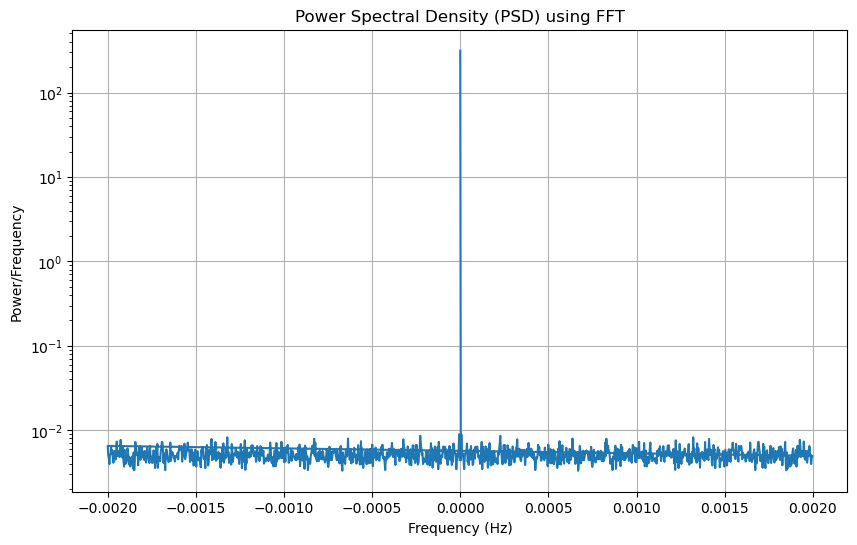

In [23]:
import numpy as np
import matplotlib.pyplot as plt

single_channel = np.array(filtered_data[0])  # Convert to NumPy array

# Calculate the Power Spectral Density (PSD) using FFT
fft_result = np.fft.fft(single_channel, axis=0)
psd = np.abs(fft_result)**2 / len(single_channel)

# Frequency values corresponding to the FFT result
frequencies = np.fft.fftfreq(len(single_channel), d=250)  # Assuming a sampling frequency of 250 Hz

# Plot the PSD
plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, psd.mean(axis=-1))  # Take the mean along the last axis
plt.title('Power Spectral Density (PSD) using FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency')
plt.grid(True)
plt.show()


